# import packages we need

In [2]:
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm

import matplotlib.pyplot as plt


# Linearly Separable

## Generate dataset

In [5]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
def plot_dataset(X_train, X_test, y_train, y_test):
    point0_train_label0 = []
    point1_train_label0 = []
    point0_train_label1 = []
    point1_train_label1 = []
    for i, point in enumerate(X_train):
        if y_train[i] == 0:
            point0_train_label0.append(point[0])
            point1_train_label0.append(point[1])
        else:
            point0_train_label1.append(point[0])
            point1_train_label1.append(point[1])

    plt.scatter(point0_train_label0, point1_train_label0, s=100, marker='v', edgecolor='blue', facecolor='none', label='Label 0 samples in Train')
    plt.scatter(point0_train_label1, point1_train_label1, s=100, marker='o', edgecolor='blue', facecolor='none', label='Label 1 samples in Train')


    # plot test set
    point0_test_label0 = []
    point1_test_label0 = []
    point0_test_label1 = []
    point1_test_label1 = []
    for i, point in enumerate(X_test):
        if y_test[i] == 0:
            point0_test_label0.append(point[0])
            point1_test_label0.append(point[1])
        else:
            point0_test_label1.append(point[0])
            point1_test_label1.append(point[1])

    plt.scatter(point0_test_label0, point1_test_label0, s=100, marker='v', edgecolor='orange', facecolor='none', label='Label 0 samples in Test')
    plt.scatter(point0_test_label1, point1_test_label1, s=100, marker='o', edgecolor='orange', facecolor='none', label='Label 1 samples in Test')

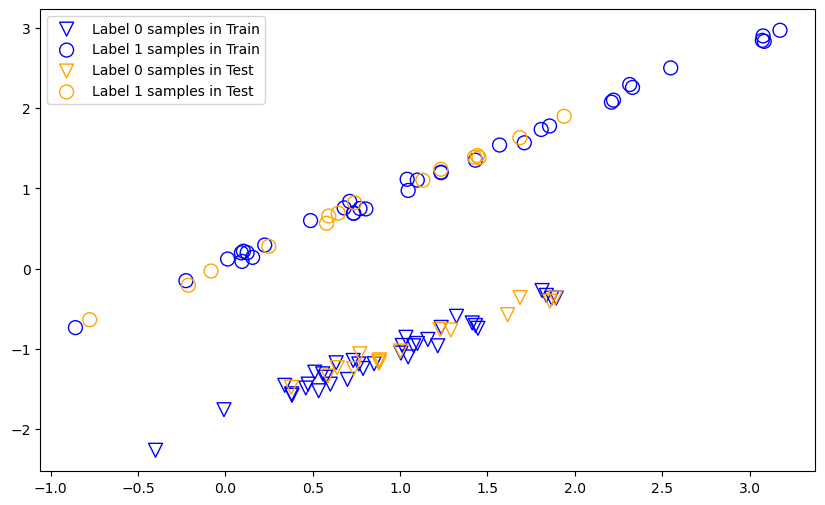

In [7]:
# plot train set
plt.figure(figsize=(10, 6))

plot_dataset(X_train, X_test, y_train, y_test)

plt.legend()
plt.show()

### Naive SVM

In [9]:
# training
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
# test
y_test_pred = classifier.predict(X_test)

## calculate accuracy in test set
correct_predictions = (y_test_pred == y_test)
n_correct_predictions = np.sum(correct_predictions)
n_total= len(y_test)
accuracy = n_correct_predictions / n_total
print(f"prediction accuracy in the test set: {accuracy}")

prediction accuracy in the test set: 1.0


In [11]:
# decision boundary
def plot_decision_boundary(classifier):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = classifier.decision_function(xy).reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='black', levels=[0], alpha=0.5)


def plot_support_vectors(classifier):
    point0_sv_label0 = []
    point1_sv_label0 = []
    point0_sv_label1 = []
    point1_sv_label1 = []
    for sv in classifier.support_vectors_:
        is_matched = (X_train == sv).all(axis=1)
        index_in_train = np.where(is_matched)[0][0]
        label = y_train[index_in_train]
        if label == 0:
            point0_sv_label0.append(sv[0])
            point1_sv_label0.append(sv[1])
        else:
            point0_sv_label1.append(sv[0])
            point1_sv_label1.append(sv[1])
    
    plt.scatter(point0_sv_label0, point1_sv_label0, s=100, color='blue', marker='o', label='Support Vectors for Label 0')
    plt.scatter(point0_sv_label1, point1_sv_label1, s=100, color='blue', marker='v', label='Support Vectors for Label 1')

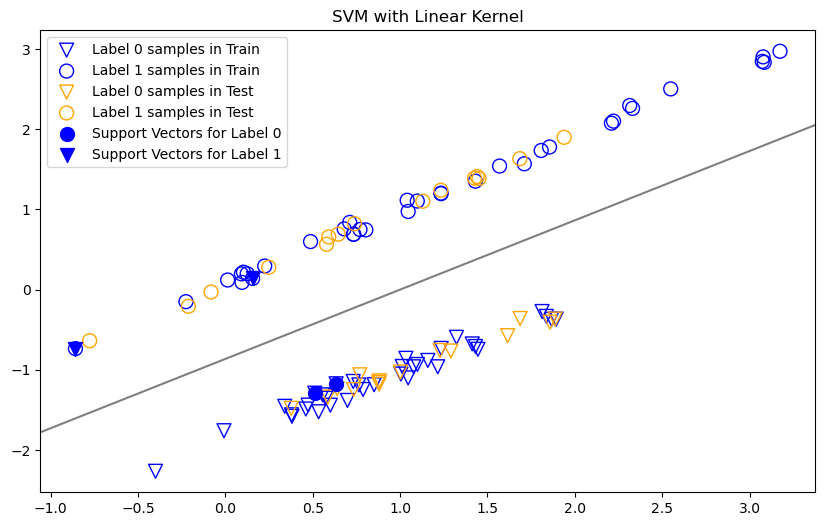

In [12]:
plt.figure(figsize=(10, 6))

plot_dataset(X_train, X_test, y_train, y_test)
plot_decision_boundary(classifier)
plot_support_vectors(classifier)

plt.legend()
plt.title('SVM with Linear Kernel')
plt.show()

# Linearly Inseparable

## Generate dataset

In [15]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=2,
                           flip_y=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

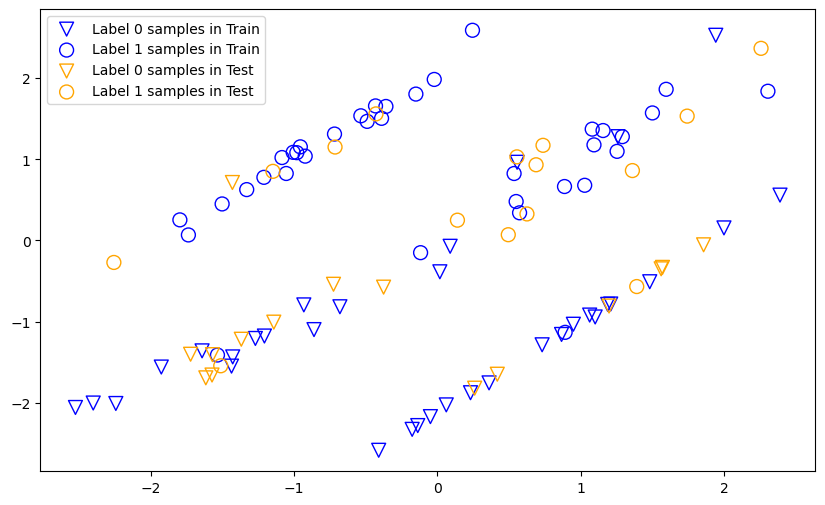

In [16]:
# plot train set
plt.figure(figsize=(10, 6))

plot_dataset(X_train, X_test, y_train, y_test)

plt.legend()
plt.show()

### Naive SVM

In [18]:
# training
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
# test
y_test_pred = classifier.predict(X_test)

## calculate accuracy in test set
correct_predictions = (y_test_pred == y_test)
n_correct_predictions = np.sum(correct_predictions)
n_total= len(y_test)
accuracy = n_correct_predictions / n_total
print(f"prediction accuracy in the test set: {accuracy}")

prediction accuracy in the test set: 0.8666666666666667


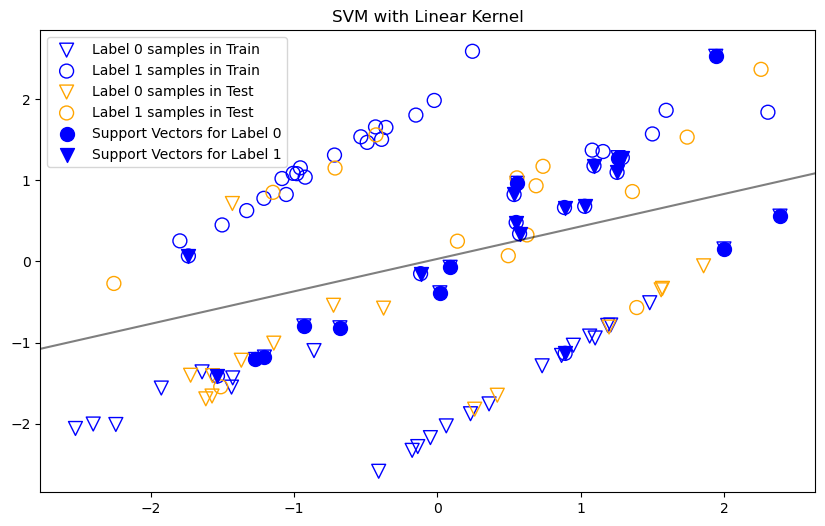

In [20]:
plt.figure(figsize=(10, 6))

plot_dataset(X_train, X_test, y_train, y_test)
plot_decision_boundary(classifier)
plot_support_vectors(classifier)

plt.legend()
plt.title('SVM with Linear Kernel')
plt.show()

### SVM + RBF kernel (radial basis function kernel)

In [22]:
# training
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)

SVC()

In [23]:
# test
y_test_pred = classifier.predict(X_test)

## calculate accuracy in test set
correct_predictions = (y_test_pred == y_test)
n_correct_predictions = np.sum(correct_predictions)
n_total= len(y_test)
accuracy = n_correct_predictions / n_total
print(f"prediction accuracy in the test set: {accuracy}")

prediction accuracy in the test set: 0.9


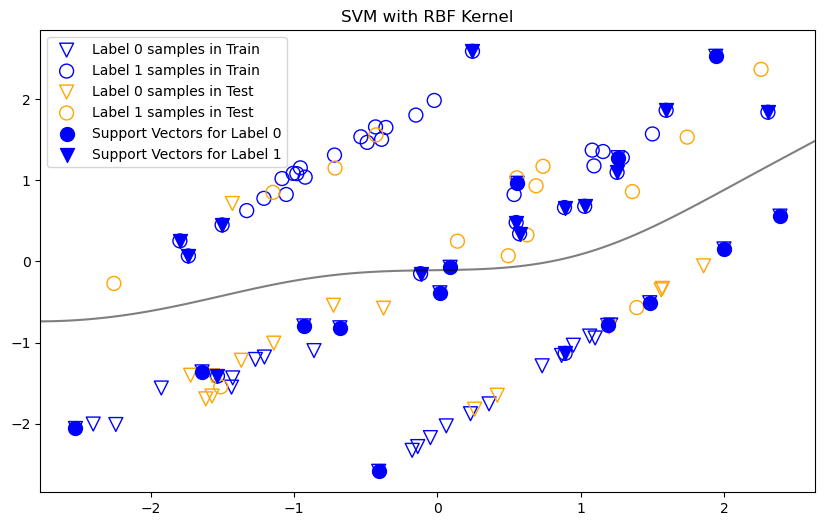

In [24]:
plt.figure(figsize=(10, 6))

plot_dataset(X_train, X_test, y_train, y_test)
plot_decision_boundary(classifier)
plot_support_vectors(classifier)

plt.legend()
plt.title('SVM with RBF Kernel')
plt.show()